# Modelling with Dynamic Clustering KNN

In [2]:
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv('Modelling Dataset.csv')

df_upcoming = dataset[dataset['source'] == 'upcoming'].copy()
df_upcoming = df_upcoming.drop(columns =["Unnamed: 0"])

dataset = dataset[dataset['source'] == 'historical'].copy()


In [71]:
# Save the upcoming set separately (for final model deployment)
df_upcoming.to_csv("upcoming_preprocessed.csv", index=False)

In [72]:
print(dataset.shape)
dataset.head()

(4360, 39)


Unnamed: 0  RedFighter_ID  BlueFighter_ID         RedFighter  \
11          11             60             885  Alexandre Pantoja   
12          12           1446             634  Shavkat Rakhmonov   
13          13            309              57         Ciryl Gane   
14          14            210             935     Bryce Mitchell   
15          15           1180             466      Nate Landwehr   

          BlueFighter  Winner      source  Skill_Diff  BlueFighter_Skill  \
11        Kai Asakura     0.0  historical    2.042789          -0.664030   
12  Ian Machado Garry     0.0  historical    0.520062           2.100826   
13   Alexander Volkov     0.0  historical    0.274928           1.284732   
14        Kron Gracie     0.0  historical    1.971959          -1.552982   
15         Dooho Choi     1.0  historical   -0.043829           1.015199   

    RedFighter_Skill  ...  BlueTotalRoundsFought  TotalRoundDif  BlueAvgTDPct  \
11          1.907847  ...              -0.993020      -1.969865     -1.388762   
12          2.758269  ...               0.410035       0.803575      0.997108   
13          1.632491  ...               2.093700       0.912337      1.344144   
14          0.928641  ...              -0.501951      -0.501573     -0.304275   
15          0.961201  ...               0.059271       0.205382      0.216278   

      AgeDif  TotalFightTimeSecs  RedAvgSubAtt  ReachDif  BlueAvgSubAtt  \
11 -0.598588           -0.610082      0.386986  0.603432      -0.760181   
12 -0.598588            2.314757      1.892772 -0.850206      -0.305855   
13  0.362980            0.682289     -0.064750 -0.268751      -0.457297   
14  1.132235           -0.027835      1.591615  0.021976      -0.002971   
15 -0.598588            0.412931      0.688143 -0.559479       0.451354   

    RedAvgSubAtt.1  RedReachCms  
11        0.386986    -1.465363  
12        1.892772     1.109244  
13       -0.064750     2.139087  
14        1.591615    -0.692981  
15        0.688143    -0.178060  

[5 rows x 39 columns]

In [6]:

X = dataset.drop(columns=["Winner", "RedFighter_ID", "RedFighter", "BlueFighter", "BlueFighter_ID", "Unnamed: 0",'source'])
y = dataset["Winner"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
print((y == 0).sum()) # Red Winners
print((y == 1).sum()) # Blue Winners

2513
1847


# SMOTE for oversampling under represented Blue class

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


/Users/avkar/PycharmProjects/FinalYearProject/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_29831/1493853714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="pastel")
/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_29831/1493853714.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Red Win (0)", "Blue Win (1)"])
/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_29831/1493853714.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette="pastel")
/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_29831/1493853714.py:18

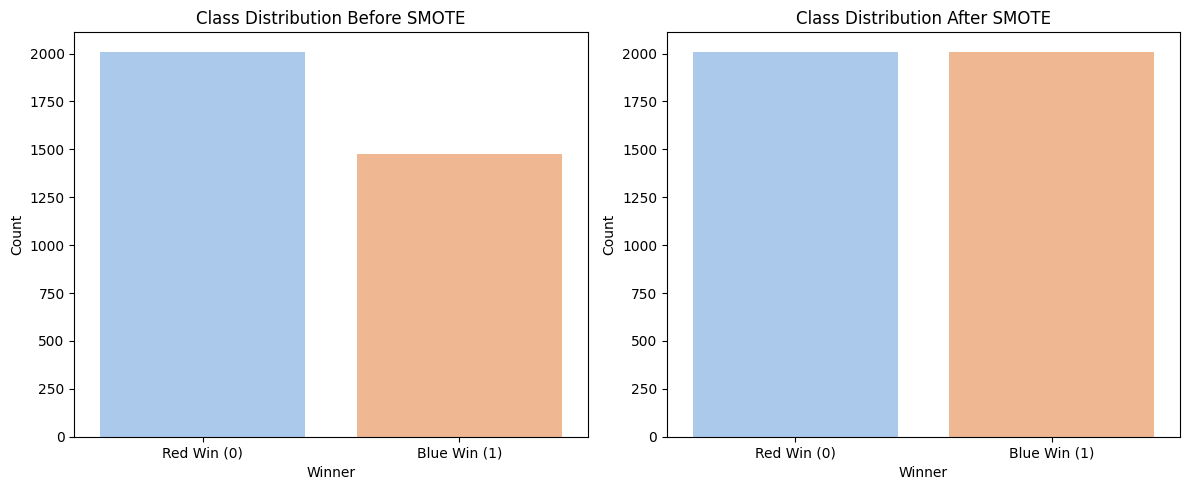

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0], palette="pastel")
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Winner")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Red Win (0)", "Blue Win (1)"])

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1], palette="pastel")
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Winner")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(["Red Win (0)", "Blue Win (1)"])
plt.tight_layout()
plt.show()



## Dimensionality reduction with t-SNE v PCA v UMAP

### t-SNE

#### Parmater Tuning

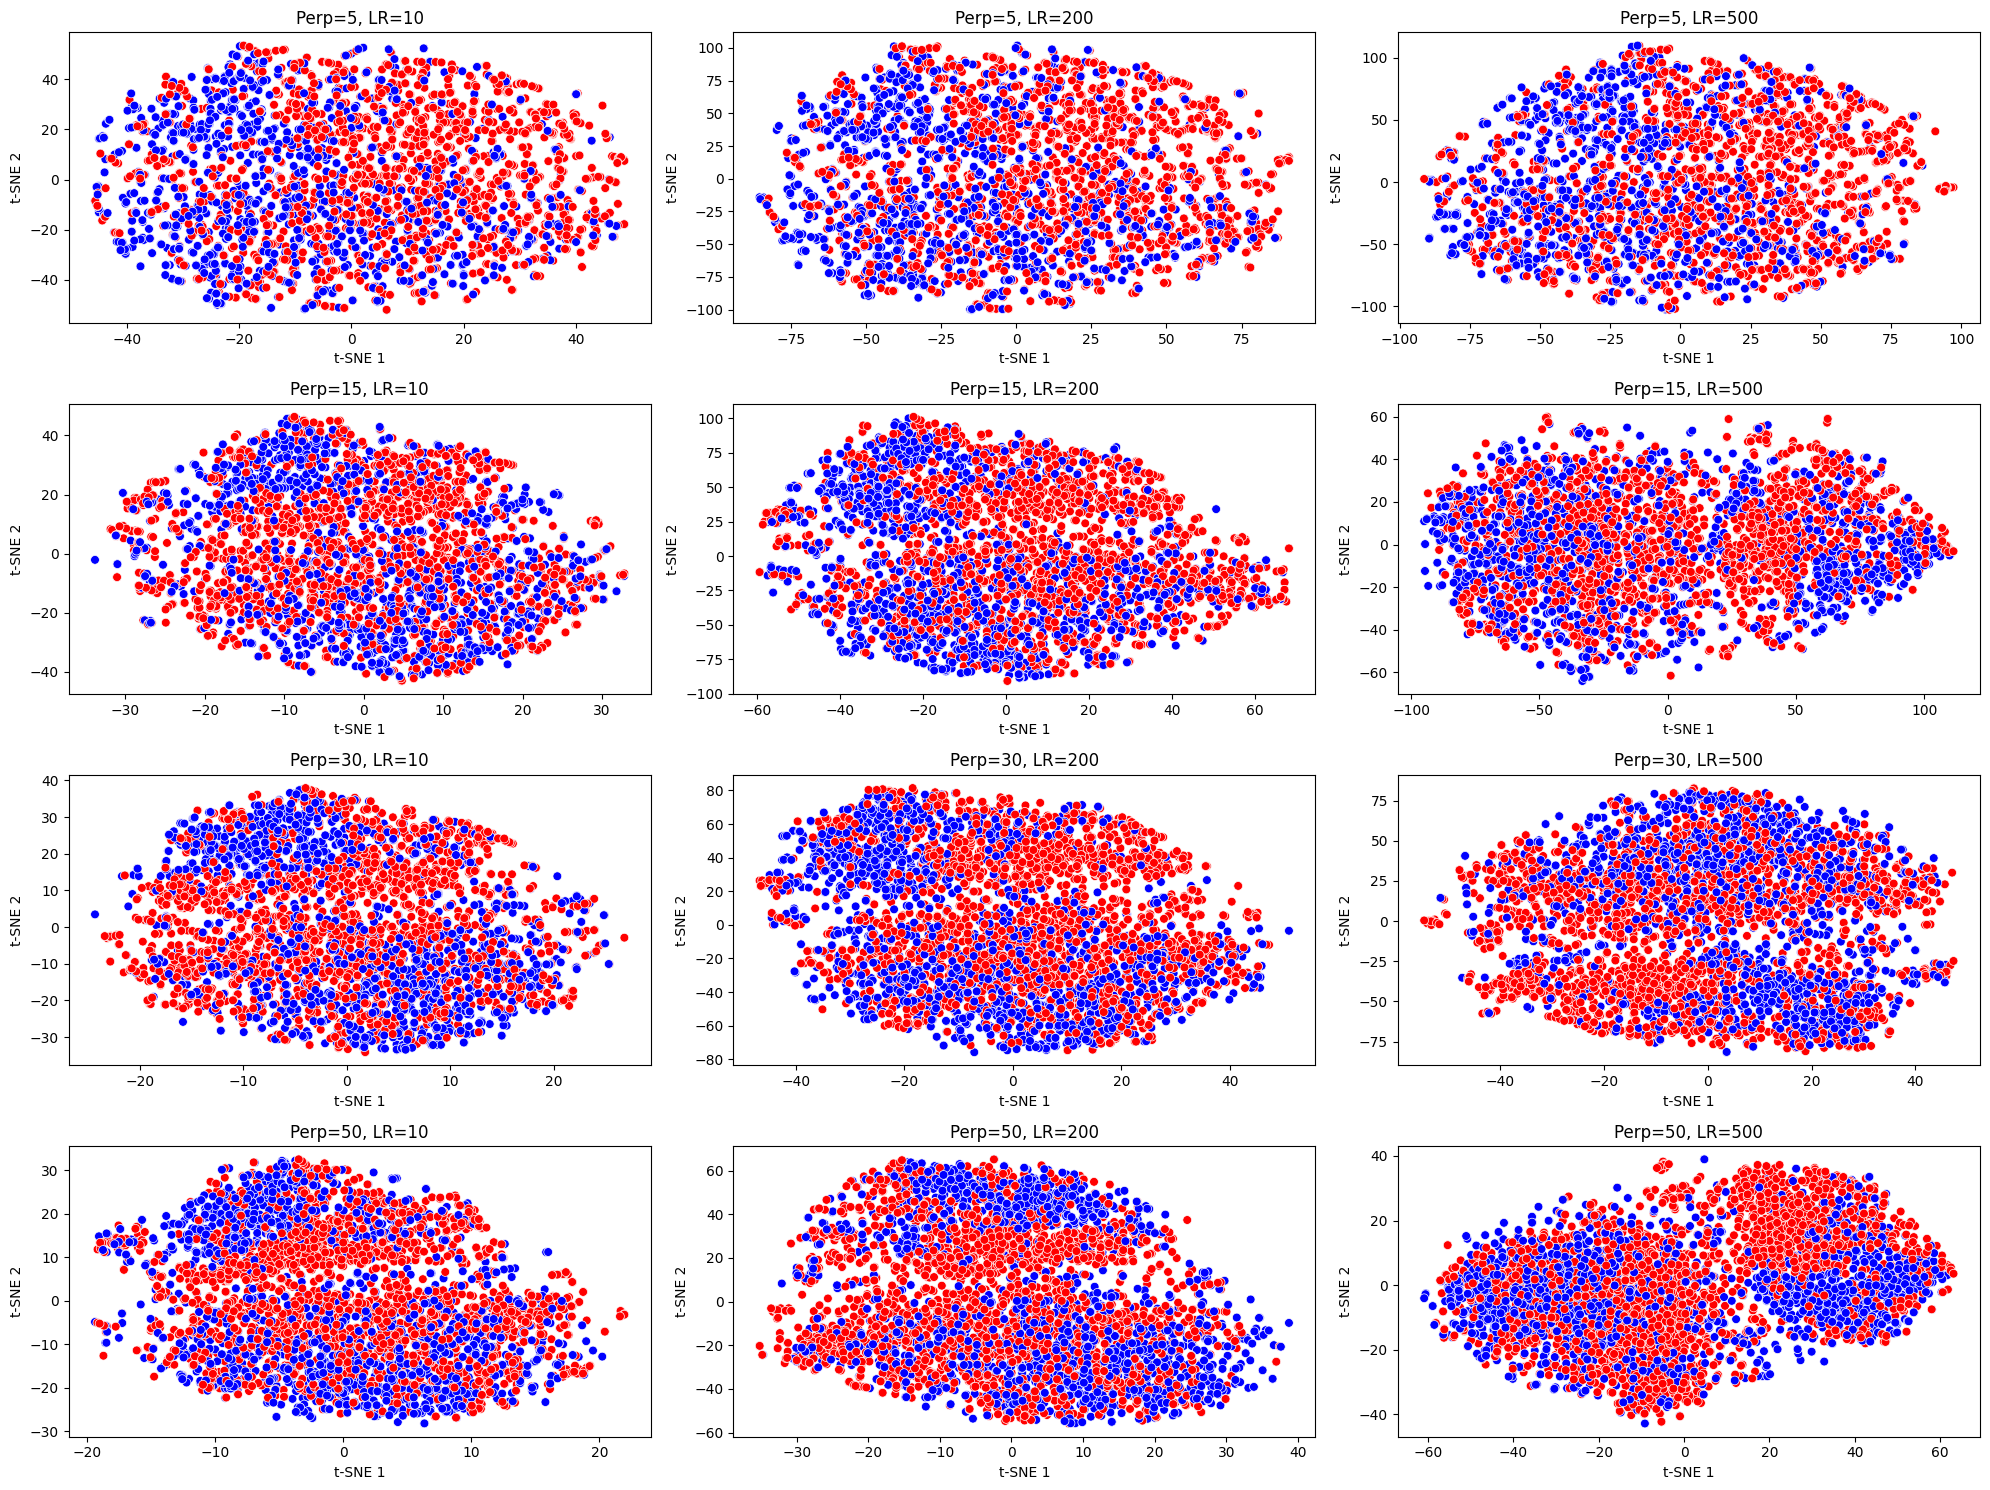

In [22]:
from sklearn.manifold import TSNE

# Define parameters to test
perplexities = [5, 15, 30, 50]
learning_rates = [10, 200, 500]

fig, axs = plt.subplots(len(perplexities), len(learning_rates), figsize=(20, 15))

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        tsne = TSNE(
            n_components=2, 
            perplexity=perplexity,
            learning_rate=learning_rate,
            early_exaggeration=12,  
            random_state=42,
            n_iter=1000,
            verbose=0
        )
        X_tsne = tsne.fit_transform(X_train)  

        sns.scatterplot(
            x=X_tsne[:, 0], y=X_tsne[:, 1],
            hue=y_train,
            palette={0: "red", 1: "blue"},
            ax=axs[i, j],
            s=40,
            legend=False
        )
        axs[i, j].set_title(f"Perp={perplexity}, LR={learning_rate}")
        axs[i, j].set_xlabel("t-SNE 1")
        axs[i, j].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train)  


/Users/avkar/PycharmProjects/FinalYearProject/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


### PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)  

### UMAP

#### Parameter Tuning

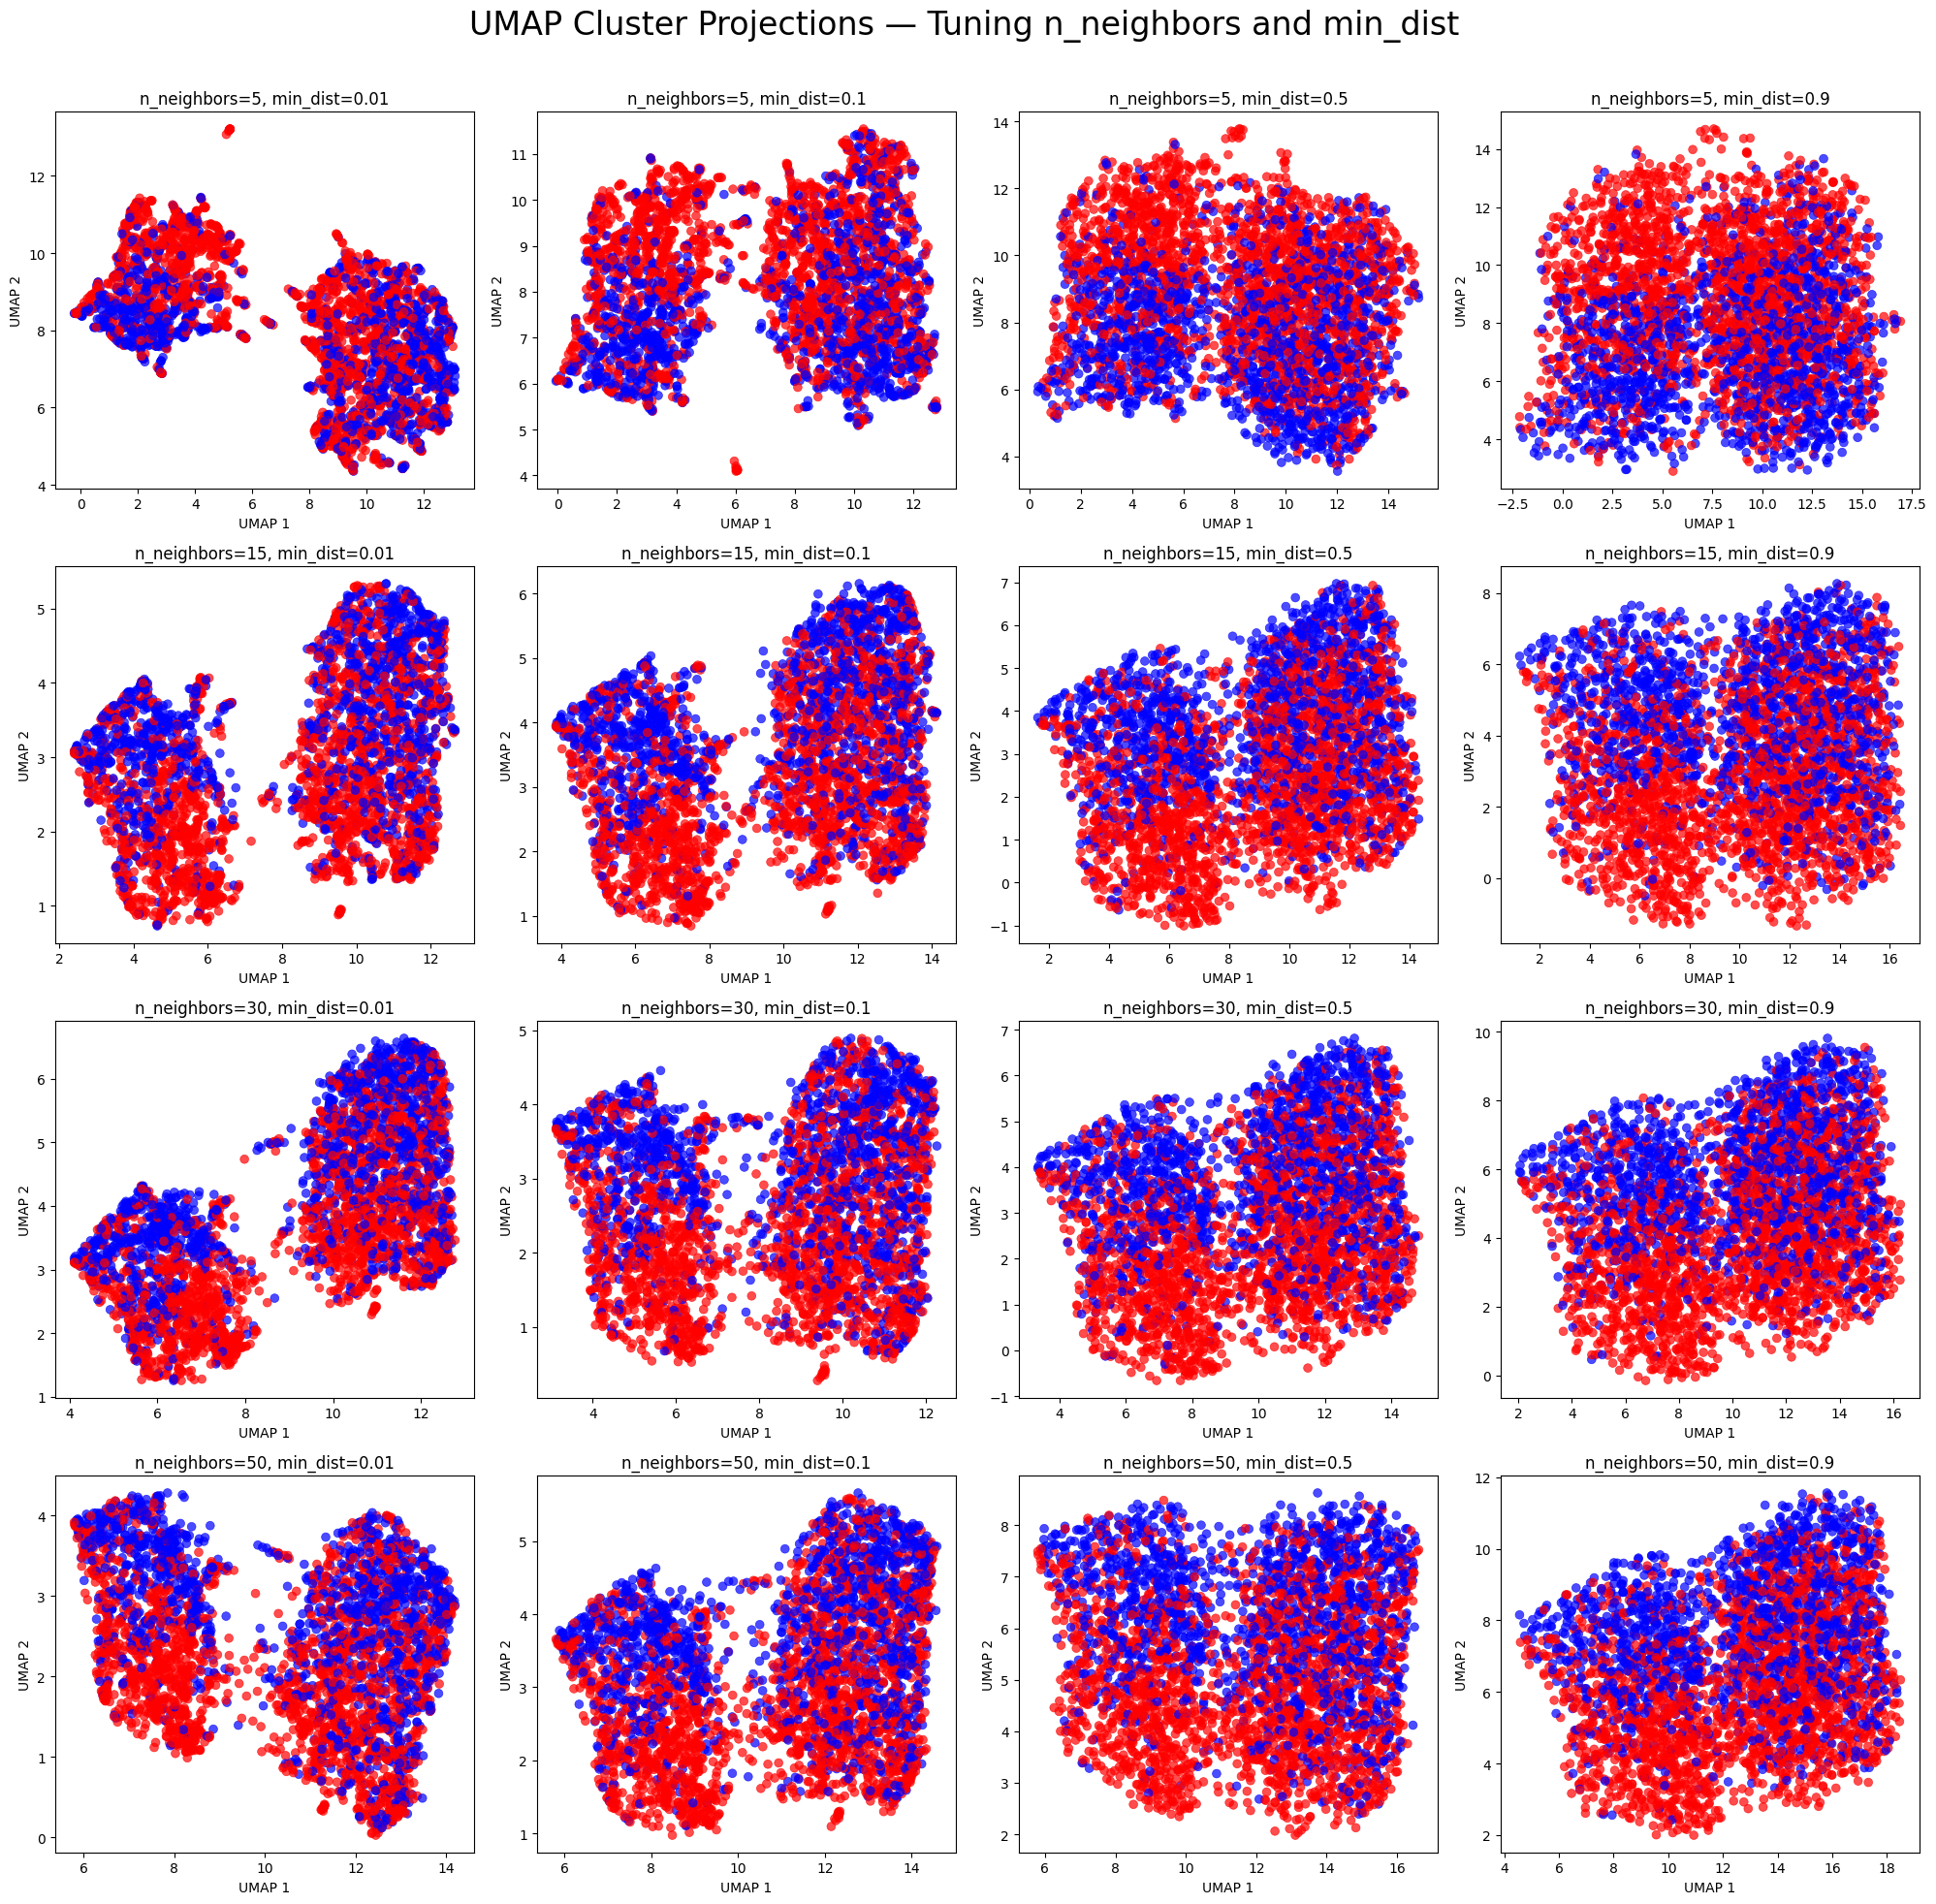

In [20]:
import umap

# Define parameter grid
n_neighbors_list = [5, 15, 30, 50]
min_dist_list = [0.01, 0.1, 0.5, 0.9]

# Set up 4x4 grid
fig, axes = plt.subplots(len(n_neighbors_list), len(min_dist_list), figsize=(20, 20))
fig.suptitle("UMAP Cluster Projections — Tuning n_neighbors and min_dist", fontsize=24)

# Loop through each param combo
for i, n_nbrs in enumerate(n_neighbors_list):
    for j, min_d in enumerate(min_dist_list):
        reducer = umap.UMAP(
            n_components=2,
            n_neighbors=n_nbrs,
            min_dist=min_d,
            random_state=42
        )
        X_umap_proj = reducer.fit_transform(X_train)

        ax = axes[i, j]
        sns.scatterplot(
            x=X_umap_proj[:, 0],
            y=X_umap_proj[:, 1],
            hue=y_train,
            palette={0: "red", 1: "blue"},  # Red = Class 0, Blue = Class 1
            ax=ax,
            s=40,
            alpha=0.7,
            edgecolor=None,
            legend=False
        )
        ax.set_title(f"n_neighbors={n_nbrs}, min_dist={min_d}", fontsize=12)
        ax.set_xlabel("UMAP 1")
        ax.set_ylabel("UMAP 2")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Testing PCA, UMAP & t-SNE with KNN 

In [15]:
from umap import UMAP
from sklearn.manifold import TSNE

umap_model = UMAP(n_components=2, n_neighbors=5, min_dist=0.01, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

tsne_model = TSNE(n_components=2, random_state=42, perplexity=15, learning_rate=500, n_iter=1000)
X_train_tsne = tsne_model.fit_transform(X_train)  




/Users/avkar/PycharmProjects/FinalYearProject/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/avkar/PycharmProjects/FinalYearProject/venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/avkar/PycharmProjects/FinalYearProject/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/avkar/PycharmProjects/FinalYearProject/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# KNN classifier
def evaluate_reduction_techniques(X_train_reduced, y_train, X_test_reduced, y_test, n_neighbours):
    acc_list = {}
    for n in n_neighbours:
        knn = KNeighborsClassifier(n)
        knn.fit(X_train_reduced, y_train)
        y_pred = knn.predict(X_test_reduced)
        acc_list[n] = accuracy_score(y_test, y_pred)

    return acc_list


In [30]:
n_neighbours = list(range(3, 20, 2))
umap_acc_list = evaluate_reduction_techniques(X_train_umap, y_train, X_test_umap, y_test, n_neighbours)
pca_acc_list = evaluate_reduction_techniques(X_train_pca, y_train, X_test_pca, y_test, n_neighbours)


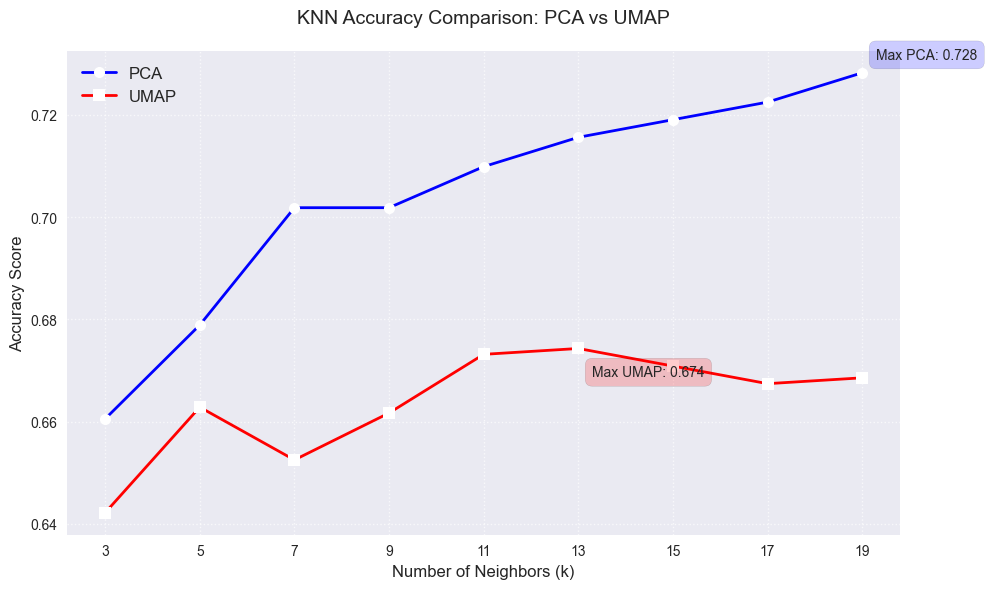

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')

# Extract values in correct order
neighbors = list(pca_acc_list.keys())
pca_scores = list(pca_acc_list.values())
umap_scores = list(umap_acc_list.values())


plt.plot(neighbors, pca_scores, 'b-o', label='PCA', 
         linewidth=2, markersize=8, markerfacecolor='white')
plt.plot(neighbors, umap_scores, 'r-s', label='UMAP', 
         linewidth=2, markersize=8, markerfacecolor='white')

# Add annotations for max values
max_pca = max(pca_scores)
max_umap = max(umap_scores)
plt.annotate(f'Max PCA: {max_pca:.3f}',
             xy=(neighbors[pca_scores.index(max_pca)], max_pca),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2))
plt.annotate(f'Max UMAP: {max_umap:.3f}',
             xy=(neighbors[umap_scores.index(max_umap)], max_umap),
             xytext=(10, -20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.2))


plt.title('KNN Accuracy Comparison: PCA vs UMAP', fontsize=14, pad=20)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(neighbors)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(fontsize=12, framealpha=1)


plt.tight_layout()
plt.show()

PCA has better performance for all n_neighbours in KNN compared to UMAP. We will use PCA for DR 

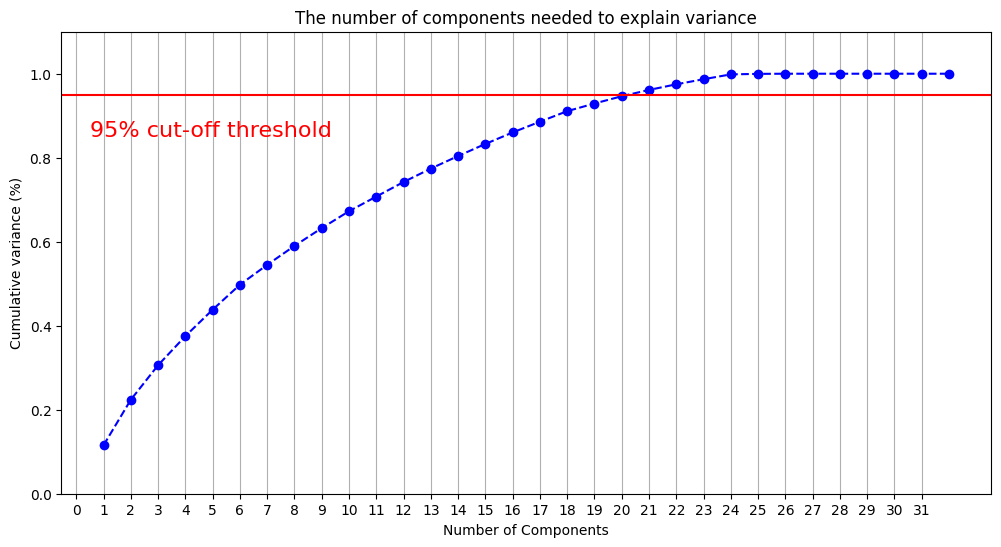

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X)

# Plotting the cumulative explained variance ratio
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, len(X.columns) + 1, step=1)  # The number of components
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

# Add labels and title
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(X.columns), step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# Add a horizontal line at 95% variance cut-off threshold
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Show grid on the x-axis
ax.grid(axis='x')

# Display the plot
plt.show()


As we can see, 21 out of the 32 components explain 95% of variance. Therefore, we'll set n_components=0.95. PCA will choose the minimum number of components that explain at least 95% of the total variance

In [30]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_resampled)

# Apply the same PCA transformation on the test data
X_test_reduced = pca.transform(X_test)

## Baseline Model: Vanilla KNN

In [31]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


def knn(X_train, y_train, X_test, y_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print("Baseline Model— Vanilla KNN")
    print(classification_report(y_test, y_pred))
    return y_pred


In [32]:
_ = knn(X_train_reduced, y_resampled, X_test_reduced, y_test, n_neighbors=5)

Baseline Model— Vanilla KNN
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.72       503
         1.0       0.63      0.73      0.68       369

    accuracy                           0.70       872
   macro avg       0.70      0.71      0.70       872
weighted avg       0.71      0.70      0.70       872



## KMeans Clustering Visualisation

In [33]:
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def visualize_kmeans_clusters_pca_reduced(X_pca_highdim, y, n_clusters_per_class, random_state=42):
    """
    Visualizes KMeans clustering on PCA-reduced data with red/blue subclass coloring.
    Class 0 = Red Win (shades of red), Class 1 = Blue Win (shades of blue).
    """
    subclass_labels = []
    all_centroids = []
    unique_classes = np.unique(y)

    for label in unique_classes:
        X_class = X_pca_highdim[y == label]
        kmeans = KMeans(n_clusters=n_clusters_per_class, random_state=random_state)
        cluster_ids = kmeans.fit_predict(X_class)

        # Decimal subclass label: e.g., 0.0, 0.1, 1.0, 1.1
        subclass_labels.extend([label + (cid / 10) for cid in cluster_ids])
        all_centroids.append(kmeans.cluster_centers_)

    subclass_labels = np.array(subclass_labels)
    all_centroids = np.vstack(all_centroids)

    # Project to 2D PCA for plotting
    pca2 = PCA(n_components=2, random_state=0)
    X2 = pca2.fit_transform(X_pca_highdim)
    C2 = pca2.transform(all_centroids)

    # Format labels for consistent coloring
    subclass_labels_str = [f"{s:.1f}" for s in subclass_labels]
    unique_subclasses = sorted(np.unique(subclass_labels_str))

    # Assign red shades for class 0, blue for class 1
    red_subs = [lbl for lbl in unique_subclasses if lbl.startswith("0")]
    blue_subs = [lbl for lbl in unique_subclasses if lbl.startswith("1")]

    red_palette = (
        ["#c62828"] if len(red_subs) == 1 else sns.color_palette("Reds", n_colors=len(red_subs))
    )
    blue_palette = (
        ["#1565c0"] if len(blue_subs) == 1 else sns.color_palette("Blues", n_colors=len(blue_subs))
    )

    color_map = dict(zip(red_subs, red_palette))
    color_map.update(dict(zip(blue_subs, blue_palette)))
    point_colors = [color_map[label] for label in subclass_labels_str]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X2[:, 0], X2[:, 1], c=point_colors, alpha=0.7,
                s=50, edgecolor="k", linewidth=0.5)

    # Centroids
    plt.scatter(C2[:, 0], C2[:, 1], marker="X", s=140, c="black",
                edgecolor="white", linewidth=1.5, label="Centroids")

    # Axis labels
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("KMeans Clustering with Subclass Colors (Red = Class 0, Blue = Class 1)")

    # Legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=lbl,
                          markerfacecolor=color_map[lbl], markersize=8, markeredgecolor="k")
               for lbl in unique_subclasses]
    plt.legend(handles=handles, title="Subclass", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [34]:
# Get the PCA components (loadings matrix)
loadings = pca.components_  # Shape: (n_components=21, n_original_features=32)
feature_names = X_train.columns.tolist()  # Original feature names

# Top features for PC1 and PC2 (first two components)
top_n = 3  # Number of top features to extract
top_pc1_idx = np.argsort(np.abs(loadings[0]))[-top_n:]  # Indices for PC1
top_pc2_idx = np.argsort(np.abs(loadings[1]))[-top_n:]   # Indices for PC2

top_pc1_features = [feature_names[i] for i in top_pc1_idx]
top_pc2_features = [feature_names[i] for i in top_pc2_idx]

print(f"Top {top_n} features for PC1:", top_pc1_features)
print(f"Top {top_n} features for PC2:", top_pc2_features)

Top 3 features for PC1: ['BlueFighter_Skill', 'RedOdds', 'BlueOdds']
Top 3 features for PC2: ['BlueAvgSigStrLanded', 'MonthsAgo', 'RecencyWeight']


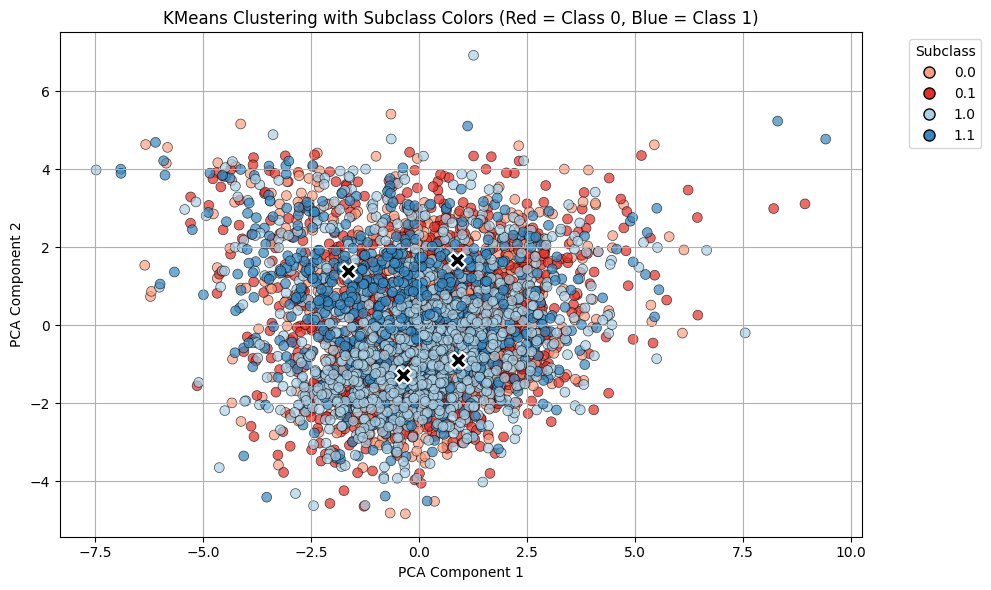

In [15]:
visualize_kmeans_clusters_pca_reduced(X_train_reduced, y_resampled, n_clusters_per_class=2)


## Algorithm 1: Weighted Dynamic Clustering with Adaptive Euclidean Distance (w/ adaptive weights and dynamic cluster reassignment)

In [35]:
def weighted_dynamic_clustering_custom(X, y, n_clusters_per_class, max_iter=100, tol=1e-6):
    """
    Returns:
    - centroids: Subclass centroids.
    - centroid_labels: Parent class labels for centroids (e.g., [0, 0, 1, 1]).
    - subclass_labels: Subclass assignments in decimal format (e.g., 0.0, 0.1, 1.0).
    - weights: Feature weights per subclass.
    """
    unique_labels = np.unique(y)
    centroids = []
    centroid_labels = []
    subclass_labels = np.zeros(len(X))  # Stores subclass assignments
    weights = []

    for label in unique_labels:
        X_class = X[y == label]
        n_clusters = n_clusters_per_class if isinstance(n_clusters_per_class, int) else n_clusters_per_class[label]

        # Random initialization of centroids and weights
        centroid_indices = np.random.choice(len(X_class), n_clusters, replace=False)
        centroids_class = X_class[centroid_indices]
        weights_class = np.ones((n_clusters, X.shape[1])) / X.shape[1]  # Uniform initial weights

        prev_partition = np.zeros(len(X_class))

        for _ in range(max_iter):
            # Assign points to subclasses using weighted Euclidean distance
            distances = np.zeros((len(X_class), n_clusters))
            for k in range(n_clusters):
                diff = X_class - centroids_class[k]
                weighted_diff = diff ** 2 * weights_class[k]
                distances[:, k] = np.sum(weighted_diff, axis=1)
            
            cluster_ids = np.argmin(distances, axis=1)

            # Check convergence
            if np.all(cluster_ids == prev_partition):
                break
            prev_partition = cluster_ids.copy()

            # Update centroids and weights
            for k in range(n_clusters):
                X_cluster = X_class[cluster_ids == k]
                if len(X_cluster) == 0:
                    continue
                
                # Update centroid (Eq. 12)
                centroids_class[k] = np.mean(X_cluster, axis=0)
                
                # Update weights (Eq. 19)
                var = np.var(X_cluster, axis=0) + 1e-8  # Avoid division by zero
                weights_class[k] = (1 / var) / np.sum(1 / var)

        # Store results for this class
        centroids.extend(centroids_class)
        centroid_labels.extend([label] * n_clusters)
        
        # Assigns decimal-format subclass labels 

        subclass_labels[y == label] = label + (cluster_ids / 10)  # e.g., 0.0, 0.1, 1.0, 1.1
        
        weights.extend(weights_class)

    return np.array(centroids), np.array(centroid_labels), subclass_labels, np.array(weights)

### DC 2D Visualisation

In [15]:
def visualize_clusters_custom(X_pca_highdim, centroids_highdim, subclass_labels,
                                 top_pc1_feats=None, top_pc2_feats=None):
    """
    Visualize DC-KNN subclasses in 2D PCA, using strong red/blue for class 0 and 1.
    """
    # Project down to 2D
    pca2 = PCA(n_components=2, random_state=0)
    X2 = pca2.fit_transform(X_pca_highdim)
    C2 = pca2.transform(centroids_highdim)

    # Format labels
    subclass_labels_str = [f"{s:.1f}" for s in subclass_labels]
    unique_labels = sorted(np.unique(subclass_labels_str))

    # Split into red and blue class subclasses
    red_subs = [lbl for lbl in unique_labels if lbl.startswith("0")]
    blue_subs = [lbl for lbl in unique_labels if lbl.startswith("1")]

    # Use stronger red/blue palettes — manually pick if only 1 subclass
    red_palette = (
        ["#c62828"] if len(red_subs) == 1 else sns.color_palette("Reds", n_colors=len(red_subs))
    )
    blue_palette = (
        ["#1565c0"] if len(blue_subs) == 1 else sns.color_palette("Blues", n_colors=len(blue_subs))
    )

    color_map = dict(zip(red_subs, red_palette))
    color_map.update(dict(zip(blue_subs, blue_palette)))

    # Assign point colors
    point_colors = [color_map[label] for label in subclass_labels_str]

    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(X2[:, 0], X2[:, 1], c=point_colors, s=60, alpha=0.75,
                edgecolor="black", linewidth=0.6)

    # Plot centroids
    plt.scatter(C2[:, 0], C2[:, 1], c="black", marker="X", s=200,
                edgecolor="white", linewidth=1.5, label="Centroids")

    # Labels
    xlabel = "PC1"
    ylabel = "PC2"
    if top_pc1_feats:
        xlabel += f" (Top: {top_pc1_feats})"
    if top_pc2_feats:
        ylabel += f" (Top: {top_pc2_feats})"
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Weighted Dynamic Clustering (Red = Class 0, Blue = Class 1)")

    # Custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=lbl,
                          markerfacecolor=color_map[lbl], markersize=8, markeredgecolor="k")
               for lbl in unique_labels]
    plt.legend(handles=handles, title="Subclass", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.grid(True)
    plt.tight_layout()
    plt.show()


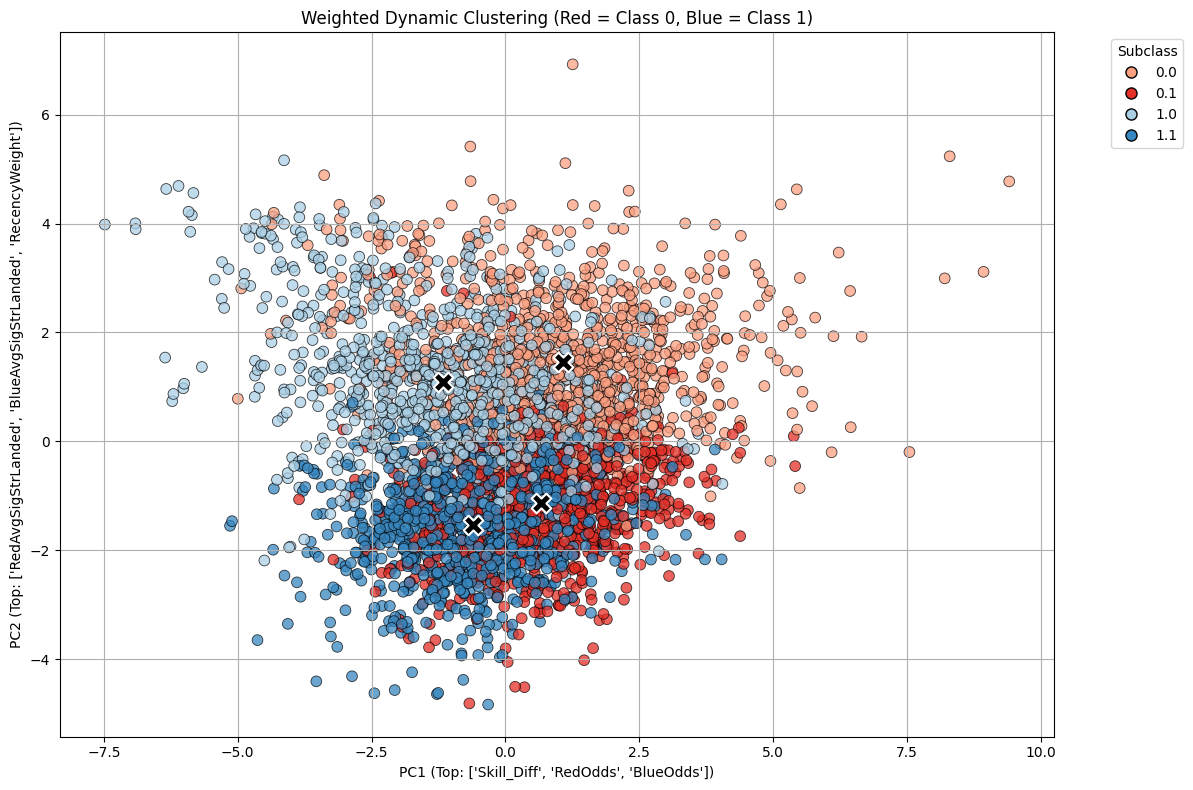

In [29]:
centroids, labels, subclass_labels, weights = weighted_dynamic_clustering_custom(
    X_train_reduced, y_resampled,
    n_clusters_per_class=2,
)
visualize_clusters_custom(
    X_train_reduced,
    centroids,
    subclass_labels,
    top_pc1_feats=top_pc1_features,
    top_pc2_feats=top_pc2_features
)

## Algorithm 2.1: DC-KNN Combining Algorithm (w/ weighted KNN)

In [36]:
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Weighted distance function (Eq.22)
def weighted_euclidean(u, v, w):
    return np.sqrt(np.sum(w * (u - v) ** 2))
    
def dc_knn_combining_algorithm(X_train, y_train, X_test, y_test, n_clusters_per_class, k, distance_metric):
    """Implements Algorithm 2 from the paper: DC-KNN with clustering and weighted KNN on original samples."""
    # Dynamic clustering
    centroids, centroid_labels, subclass_labels, weights = weighted_dynamic_clustering_custom(
        X_train, y_train, n_clusters_per_class)
    
    # Map original training sample index to subclass index
    unique_subclass_labels = np.unique(subclass_labels)
    subclass_index_mapping = {label: idx for idx, label in enumerate(unique_subclass_labels)}
    sample_to_subclass = np.array([subclass_index_mapping[label] for label in subclass_labels])

    # Prepare KNN on original X_train
    neigh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    neigh.fit(X_train)

    y_pred = []
    for x in X_test:
        # Find k nearest neighbors (unweighted for initial selection)
        distances, indices = neigh.kneighbors([x])
        indices = indices[0]

        # For each neighbor, calculate weighted distance using its subclass weights
        weighted_dists = []
        for idx in indices:
            subclass_id = sample_to_subclass[idx]
            subclass_weight = weights[subclass_id]
            
            # Use passed-in distance function
            if distance_metric.__code__.co_argcount == 2:
                dist = distance_metric(x, X_train[idx])
            else:
                dist = distance_metric(x, X_train[idx], subclass_weight)

            weighted_dists.append((dist, subclass_id, y_train.iloc[idx]))
  

            
        # Sort neighbors by weighted distance
        weighted_dists.sort(key=lambda tup: tup[0])

        # Get most frequent subclass among top-k
        top_k_subclass_ids = [tup[1] for tup in weighted_dists[:k]]
        most_common_subclass = Counter(top_k_subclass_ids).most_common(1)[0][0]

        # Convert back to class label
        pred_class = int(str(unique_subclass_labels[most_common_subclass])[0])  # e.g. from 1.2 → 1
        y_pred.append(pred_class)

    print("Algorithm 2 — DC-KNN with Standard Data-Level KNN")
    print(classification_report(y_test, y_pred))
    return np.array(y_pred)


## Algorithm 3: DC-KNN Using Centroids as Nearest Neighbors

In [37]:
def dc_knn_centroid_nn(X_train, y_train, X_test, y_test, n_clusters_per_class,k, distance_metric):
    """Implements Algorithm 3: DC-KNN using Centroids as Nearest Neighbors. """
    # Perform Dynamic Clustering (Algorithm 1)
    centroids, centroid_labels, _, weights = weighted_dynamic_clustering_custom(
        X_train, y_train, n_clusters_per_class
    )

    # Predict class based on closest centroids
    y_pred = []
    for x in X_test:
        # Compute distance from x to each centroid
        distances = np.array([
            distance_metric(x, c) if distance_metric.__code__.co_argcount == 2 
            else distance_metric(x, c, w)
            for c, w in zip(centroids, weights)
        ])

        # Get k nearest centroid indices
        nearest_idxs = np.argsort(distances)[:k]
        nearest_labels = [centroid_labels[i] for i in nearest_idxs]

        # Majority vote
        pred = np.bincount(nearest_labels).argmax()
        y_pred.append(pred)

    # Evaluation
    print("Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors")
    print(classification_report(y_test, y_pred))

    return np.array(y_pred)


## Baseline Evaluation

### Standard DC-KNN

In [38]:
_ = dc_knn_combining_algorithm(X_train_reduced, y_resampled, X_test_reduced, y_test, n_clusters_per_class=2, k=5, distance_metric=weighted_euclidean)

Algorithm 2 — DC-KNN with Standard Data-Level KNN
              precision    recall  f1-score   support

         0.0       0.78      0.66      0.72       503
         1.0       0.62      0.75      0.68       369

    accuracy                           0.70       872
   macro avg       0.70      0.70      0.70       872
weighted avg       0.71      0.70      0.70       872



### Test C (DC-KNN - Centroid-base nearest neighbour)

In [39]:
_ = dc_knn_centroid_nn(
    X_train_reduced, 
    y_resampled,
    X_test_reduced,
    y_test,
    n_clusters_per_class=3,
    k=5,
    distance_metric=weighted_euclidean
)

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       503
         1.0       0.68      0.62      0.65       369

    accuracy                           0.72       872
   macro avg       0.71      0.70      0.71       872
weighted avg       0.71      0.72      0.71       872



## Hyper-Parameter Tuning

In [40]:
from sklearn.model_selection import StratifiedKFold
from itertools import product
from scipy.spatial.distance import euclidean, cityblock  # cityblock = Manhattan

param_grid = {
    "n_clusters_per_class": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "k_neighbours": [3, 5, 7, 9, 11, 13, 15, 17, 19],
    "distance_metric": [euclidean, cityblock, weighted_euclidean]
}

def hyperparameter_tune(model, X_train, y_train, param_grid):
    best_score = 0
    best_combo = None
    all_combos = {}

    # Choose grid depending on model
    if model == knn:
        grid = product(param_grid['k_neighbours'])
    else:
        grid = product(
            param_grid['n_clusters_per_class'],
            param_grid['k_neighbours'],
            param_grid['distance_metric']
        )

    # 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for combo in grid:
        acc_scores = []

        for train_idx, test_idx in cv.split(X_train, y_train):
            X_tr, X_te = X_train[train_idx], X_train[test_idx]
            y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

            if model == knn:
                k = combo[0]
                y_pred = model(X_tr, y_tr, X_te, y_te, n_neighbors=k)
                log_str = f"k_neighbours={k}"

            else:
                n_clusters, k, metric = combo

                # Special constraint for centroid-level DC-KNN
                if model.__name__ == "dc_knn_centroid_nn" and k >= 2 * n_clusters:
                    continue

                y_pred = model(
                    X_tr, y_tr, X_te, y_te,
                    n_clusters_per_class=n_clusters,
                    k=k,
                    distance_metric=metric
                )
                log_str = f"n_clusters={n_clusters}, k_neighbours={k}, metric={metric}"

            # Append after prediction
            acc_scores.append(accuracy_score(y_te, y_pred))

        if acc_scores:  # Only computes mean if not empty
            mean_acc = np.mean(acc_scores)
            all_combos[combo] = mean_acc
            print(f"Tested: {log_str} --> Acc: {mean_acc:.4f}")

            if mean_acc > best_score:
                best_score = mean_acc
                best_combo = combo

    print(f"\nBest Params for {model.__name__}: {best_combo} → Accuracy: {round(best_score, 4)}")
    return best_combo, all_combos


In [63]:
best_params_dc_knn, all_combos_dc_knn = hyperparameter_tune(
    model=dc_knn_combining_algorithm,  
    X_train=X_train_reduced,
    y_train=y_resampled,
    param_grid=param_grid
)



Algorithm 2 — DC-KNN with Standard Data-Level KNN
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       402
           1       0.70      0.81      0.75       402

    accuracy                           0.73       804
   macro avg       0.74      0.73      0.73       804
weighted avg       0.74      0.73      0.73       804

Algorithm 2 — DC-KNN with Standard Data-Level KNN
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       402
           1       0.72      0.81      0.76       402

    accuracy                           0.75       804
   macro avg       0.75      0.75      0.74       804
weighted avg       0.75      0.75      0.74       804

Algorithm 2 — DC-KNN with Standard Data-Level KNN
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       402
           1       0.71      0.78      0.74       402

    accuracy                    

In [64]:
best_params_knn = hyperparameter_tune(
    model=knn,  
    X_train=X_train_reduced,
    y_train=y_resampled,
    param_grid=param_grid
)

Baseline Model— Vanilla KNN
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       402
           1       0.71      0.82      0.76       402

    accuracy                           0.74       804
   macro avg       0.75      0.74      0.74       804
weighted avg       0.75      0.74      0.74       804

Baseline Model— Vanilla KNN
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       402
           1       0.73      0.81      0.77       402

    accuracy                           0.75       804
   macro avg       0.76      0.75      0.75       804
weighted avg       0.76      0.75      0.75       804

Baseline Model— Vanilla KNN
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       402
           1       0.70      0.78      0.74       402

    accuracy                           0.72       804
   macro avg       0.73      0.72      0.72 

In [19]:
best_params_dc_knn_centorid, all_combos_dc_knn_cent = hyperparameter_tune(
    model=dc_knn_centroid_nn,  
    X_train=X_train_reduced,
    y_train=y_resampled,
    param_grid=param_grid
)

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       402
           1       0.74      0.50      0.60       402

    accuracy                           0.66       804
   macro avg       0.68      0.66      0.65       804
weighted avg       0.68      0.66      0.65       804

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       402
           1       0.67      0.71      0.69       402

    accuracy                           0.68       804
   macro avg       0.68      0.68      0.68       804
weighted avg       0.68      0.68      0.68       804

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

           0       0.76      0.41      0.53       402
           1       0.59      0.87      0.71       402

    a

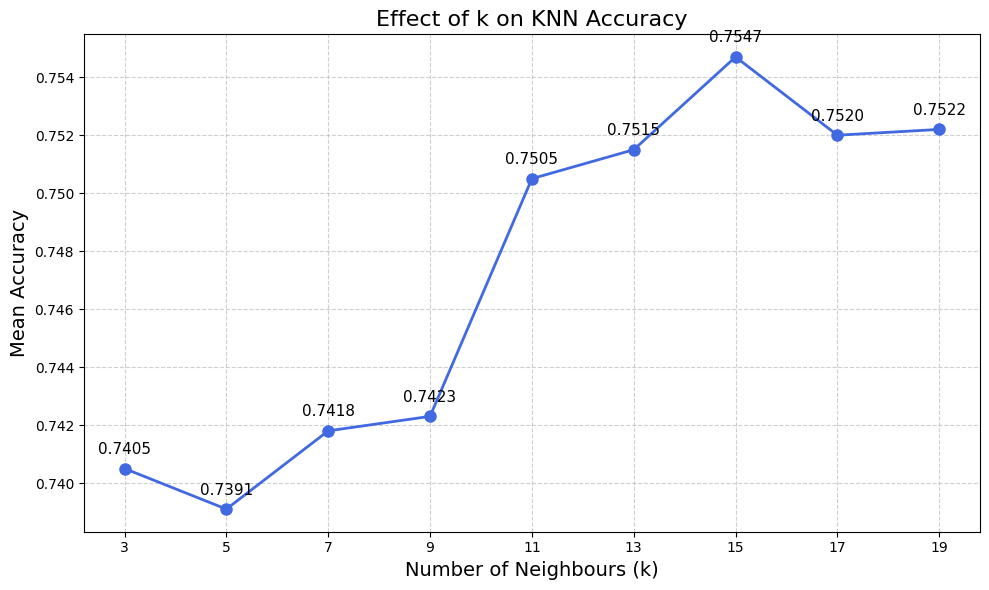

In [76]:
n_neighbour_scores = {3: 0.7405, 5: 0.7391, 7: 0.7418,
                      9: 0.7423, 11: 0.7505, 13: 0.7515,
                      15: 0.7547, 17: 0.7520, 19: 0.7522}

X = list(n_neighbour_scores.keys())
y= list(n_neighbour_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8)
plt.title("Effect of k on KNN Accuracy", fontsize=16)
plt.xlabel("Number of Neighbours (k)", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.xticks(X)
plt.grid(True, linestyle='--', alpha=0.6)

# Add score labels to each point
for i, (x, score) in enumerate(zip(X, y)):
    plt.text(x, score + 0.0005, f"{score:.4f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

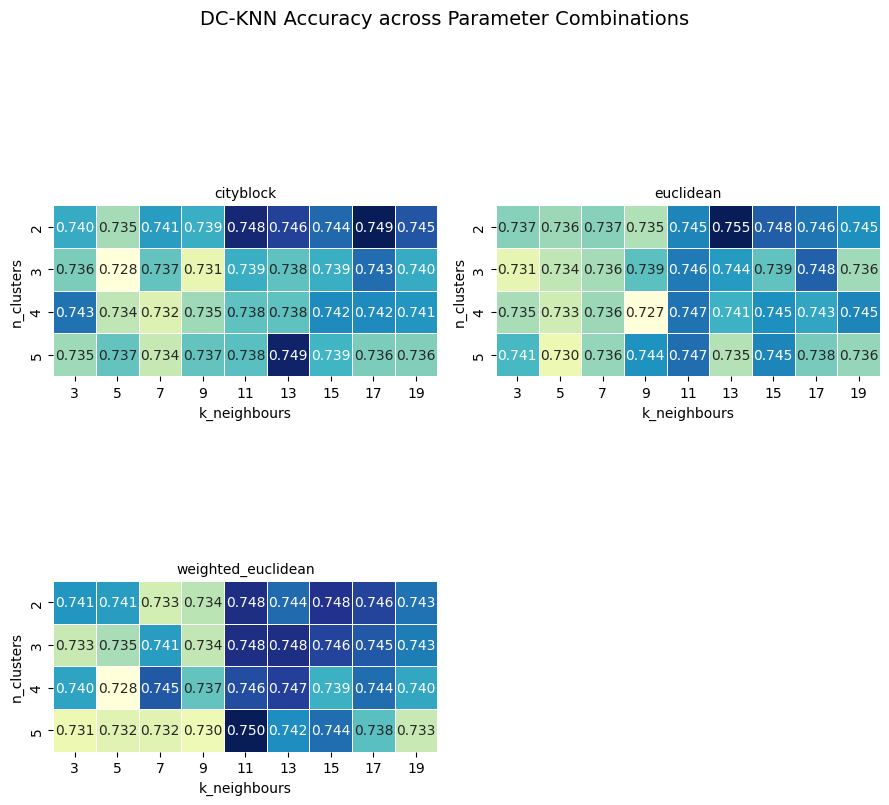

In [67]:
# Convert all_combos to a tidy DataFrame
results_df = pd.DataFrame([
    {
        "n_clusters": combo[0],
        "k_neighbours": combo[1],
        "metric": combo[2].__name__,
        "accuracy": acc
    }
    for combo, acc in all_combos_dc_knn.items()
])

# Make sure all values are floats, sort for better structure
results_df = results_df.sort_values(by=["metric", "n_clusters", "k_neighbours"])

# Create FacetGrid with better layout
g = sns.FacetGrid(
    results_df, col="metric", col_wrap=2, height=4.5,
    sharex=False, sharey=False, margin_titles=True
)

# Apply heatmaps cleanly to each subplot
def draw_heatmap(data, **kwargs):
    pivoted = data.pivot(index="n_clusters", columns="k_neighbours", values="accuracy")
    sns.heatmap(
        pivoted,
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar=False,
        square=True
    )

g.map_dataframe(draw_heatmap)

# Formatting titles and layout
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("DC-KNN Accuracy across Parameter Combinations", fontsize=14)
plt.show()


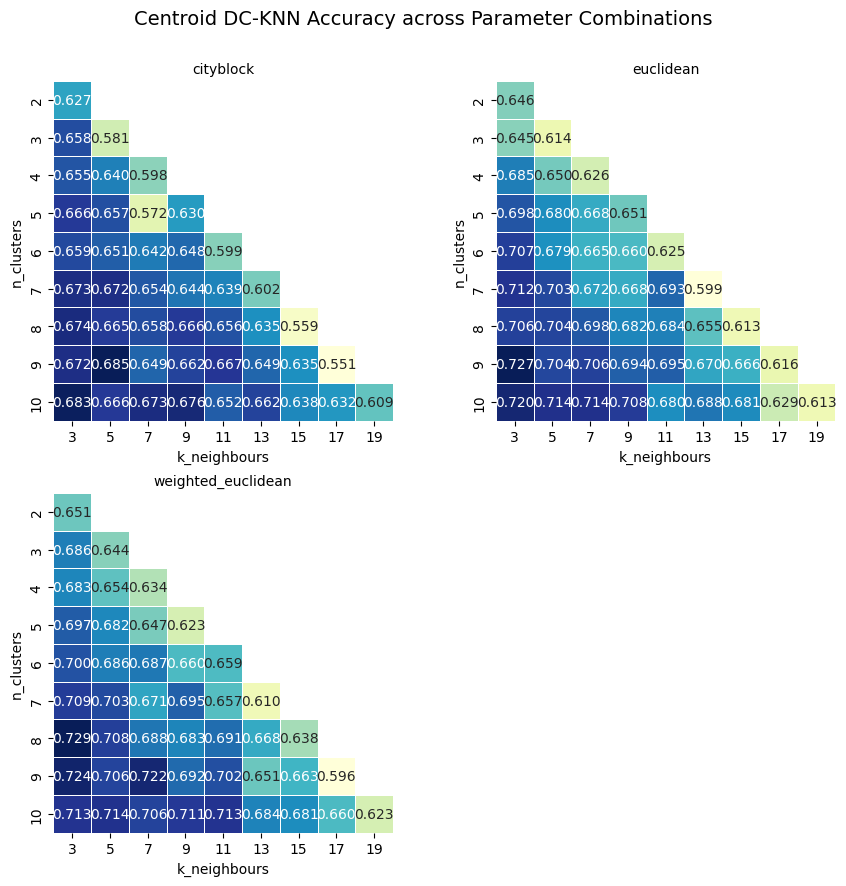

In [22]:
# Convert all_combos to a tidy DataFrame
results_df = pd.DataFrame([
    {
        "n_clusters": combo[0],
        "k_neighbours": combo[1],
        "metric": combo[2].__name__,
        "accuracy": acc
    }
    for combo, acc in all_combos_dc_knn_cent.items()
])

# Make sure all values are floats, sort for better structure
results_df = results_df.sort_values(by=["metric", "n_clusters", "k_neighbours"])

# Create FacetGrid with better layout
g = sns.FacetGrid(
    results_df, col="metric", col_wrap=2, height=4.5,
    sharex=False, sharey=False, margin_titles=True
)

g.map_dataframe(draw_heatmap)

# Formatting titles and layout
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Centroid DC-KNN Accuracy across Parameter Combinations", fontsize=14)
plt.show()


## Ensemble DC-KNN with Random Forest

### Hyperparameter Tune Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,            # 5-fold cross-validation
    scoring='f1',     # Or 'accuracy', 'roc_auc', etc.
    n_jobs=-1,       # Use all CPU cores
    verbose=2
)

grid_search.fit(X_train_reduced, y_resampled)


best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'class_weight': None, 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# === Train Best DC-KNN Model ===
def predict_dc_knn_proba(X_test_samples):
    """Wrapper to get DC-KNN probabilities in correct format for ensemble"""
    preds = dc_knn_combining_algorithm(
        X_train_reduced, y_resampled,
        X_test_samples, y_test.iloc[:len(X_test_samples)], 
        n_clusters_per_class=2,
        k=13,
        distance_metric=euclidean
    )
    # Convert predictions to probabilities [n_samples, 2]
    proba = np.zeros((len(preds), 2))
    proba[:, 1] = preds  # Binary classification where preds are 0/1
    proba[:, 0] = 1 - proba[:, 1]
    return proba


In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# === Train Best DC-KNN Centroid Model ===
def predict_dc_knn_centroid_proba(X_test_samples):
    """Wrapper to get DC-KNN probabilities in correct format for ensemble"""
    preds = dc_knn_centroid_nn(
        X_train_reduced, y_resampled,
        X_test_samples, y_test.iloc[:len(X_test_samples)], 
        n_clusters_per_class=8,
        k=3,
        distance_metric=weighted_euclidean
    )
    # Convert predictions to probabilities [n_samples, 2]
    proba = np.zeros((len(preds), 2))
    proba[:, 1] = preds  # Assuming binary classification where preds are 0/1
    proba[:, 0] = 1 - proba[:, 1]
    return proba


# Hold-out test results

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def get_cm(y_test, y_pred, model):
    # Confusion Matrix for DC-KNN Standard + RF 
    cm = confusion_matrix(y_test, y_pred)
    disp_std = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Red Win", "Blue Win"])
    disp_std.plot(cmap="Reds")
    plt.title(f"{model} Confusion Matrix")
    plt.grid(False)
    plt.show()

## Vanilla KNN

Baseline Model— Vanilla KNN
              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       503
         1.0       0.62      0.76      0.69       369

    accuracy                           0.70       872
   macro avg       0.71      0.71      0.70       872
weighted avg       0.72      0.70      0.71       872



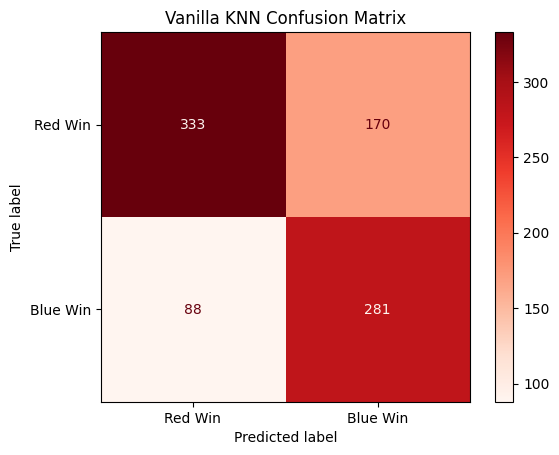

In [44]:
knn_pred = knn(X_train_reduced, y_resampled, X_test_reduced, y_test, n_neighbors=15)
knn_cm = get_cm(y_test, knn_pred, 'Vanilla KNN')


## Random Forest Classifier

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       503
         1.0       0.74      0.72      0.73       369

    accuracy                           0.78       872
   macro avg       0.77      0.77      0.77       872
weighted avg       0.78      0.78      0.78       872



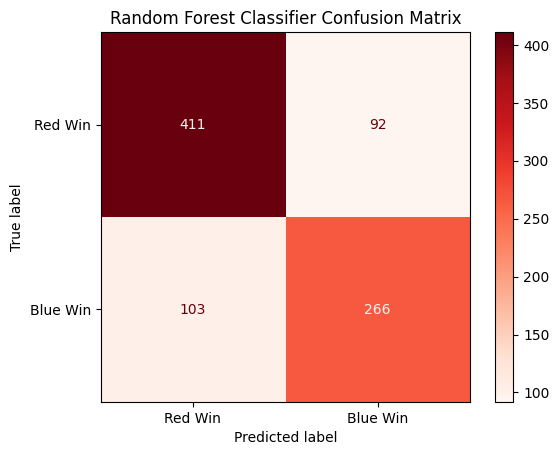

In [218]:
# Evaluate on test set
# === Train Parameter Tuned Random Forest Classifier ===
rf = RandomForestClassifier(n_estimators=300, 
                            random_state=42, 
                            class_weight=None, 
                            max_depth=30,
                            min_samples_split=2,
    )

rf.fit(X_train_reduced, y_resampled)

rf_preds = rf.predict(X_test_reduced)
print(classification_report(y_test, rf_preds))
rf_cm = get_cm(y_test, rf_preds, model="Random Forest Classifier")

## Ensemble DC-KNN + RF 

Algorithm 2 — DC-KNN with Standard Data-Level KNN
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       503
         1.0       0.63      0.76      0.69       369

    accuracy                           0.71       872
   macro avg       0.71      0.72      0.71       872
weighted avg       0.73      0.71      0.71       872

DC-KNN + RF Ensemble Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       503
         1.0       0.75      0.78      0.77       369

    accuracy                           0.80       872
   macro avg       0.79      0.80      0.80       872
weighted avg       0.80      0.80      0.80       872



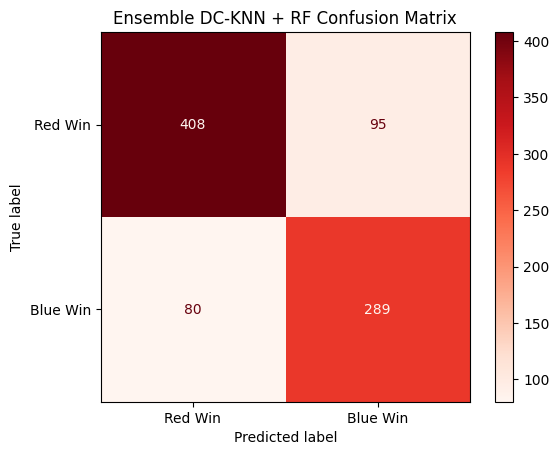

In [217]:
# Get DC-KNN probabilities for all test samples at once
dc_knn_proba = predict_dc_knn_proba(X_test_reduced)
rf_proba = rf.predict_proba(X_test_reduced)

# Stack predictions as features
X_stack = np.column_stack([dc_knn_proba[:, 1], rf_proba[:, 1]])  

# Train a meta-model with GradientBoostingClassifier
stacker_std = GradientBoostingClassifier()
stacker_std.fit(X_stack, y_test) 
ensemble_preds = stacker.predict(X_stack)

# CR 
print("DC-KNN + RF Ensemble Classification Report:")
print(classification_report(y_test, ensemble_preds))

# Confusion Matrix for DC-KNN Standard + RF 
cm_dc_knn_rf = get_cm(y_test, ensemble_preds, 'Ensemble DC-KNN + RF')

### Ensemble DC-KNN - Centroid Level + RF 

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       503
         1.0       0.63      0.75      0.69       369

    accuracy                           0.71       872
   macro avg       0.71      0.72      0.71       872
weighted avg       0.72      0.71      0.71       872

DC-KNN - Centroid Level + RF Ensemble Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       503
         1.0       0.76      0.79      0.78       369

    accuracy                           0.81       872
   macro avg       0.80      0.80      0.80       872
weighted avg       0.81      0.81      0.81       872



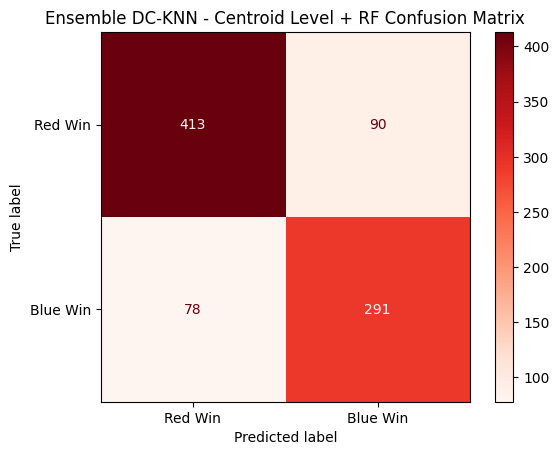

In [211]:
# Get DC-KNN Centroid probabilities for all test samples at once
dc_knn_cent_proba = predict_dc_knn_centroid_proba(X_test_reduced)

# Stack predictions as features
X_stack_cent = np.column_stack([dc_knn_cent_proba[:, 1], rf_proba[:, 1]])  

stacker_cent = GradientBoostingClassifier()
stacker_cent.fit(X_stack_cent, y_test) 
ensemble_preds_cent = stacker.predict(X_stack_cent)

# CR
print("DC-KNN - Centroid Level + RF Ensemble Classification Report:")
print(classification_report(y_test, ensemble_preds_cent))

# Confusion Matrix for DC-KNN Standard
cm_dc_knn_cent_rf = get_cm(y_test, ensemble_preds_cent, 'Ensemble DC-KNN - Centroid Level + RF')


## DC-KNN - Centroid Level

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       503
         1.0       0.63      0.75      0.69       369

    accuracy                           0.71       872
   macro avg       0.71      0.71      0.71       872
weighted avg       0.72      0.71      0.71       872



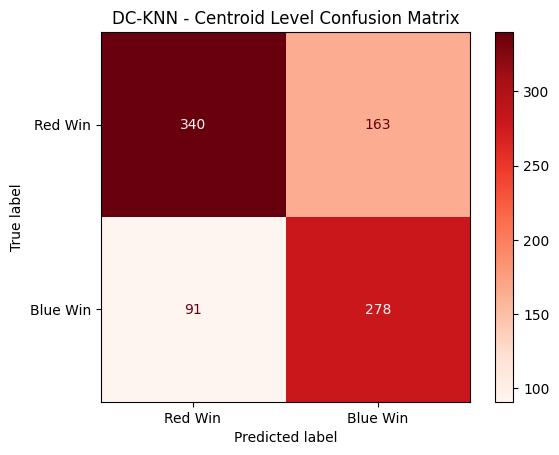

In [48]:
params_centroid = {"n_clusters_per_class": 8, "k": 3, "distance_metric": weighted_euclidean}

# Algorithm 3 – DC-KNN Centroid-Level
y_pred_centroid = dc_knn_centroid_nn(
    X_train_reduced, y_resampled, X_test_reduced, y_test,
    **params_centroid
)

# Confusion Matrix for DC-KNN Centroid-Level
cm_cent = get_cm(y_test, y_pred_centroid, 'DC-KNN - Centroid Level')

### DC-KNN

Algorithm 2 — DC-KNN with Standard Data-Level KNN
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       503
         1.0       0.60      0.67      0.64       369

    accuracy                           0.68       872
   macro avg       0.67      0.68      0.67       872
weighted avg       0.68      0.68      0.68       872



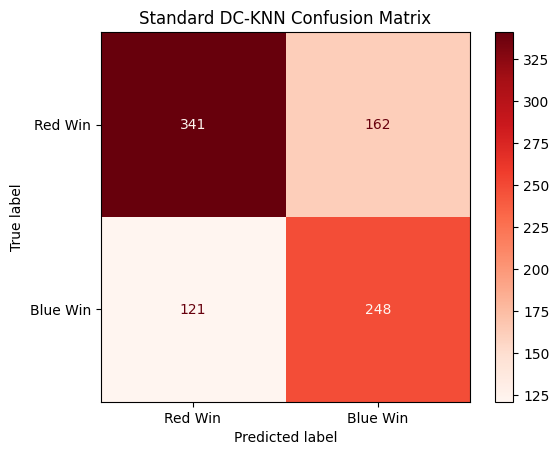

In [216]:
params_standard = {"n_clusters_per_class": 2, "k": 13, "distance_metric": euclidean}

# Algorithm 3 – DC-KNN Centroid-Level
y_pred_standard = dc_knn_combining_algorithm(
    X_train_reduced, y_resampled, X_test_reduced, y_test,
    **params_centroid
)
# Confusion Matrix for DC-KNN Centroid-Level
cm_standard = get_cm(y_test, y_pred_standard, 'Standard DC-KNN')

# Save DC-KNN Centroid + RF ensemble model

In [147]:
import joblib

joblib.dump(stacker_cent, 'ensemble_dc_knn_centroid_rf.pkl')
joblib.dump(rf, 'rf_model.pkl')
print("RF model saved as 'rf_model.pkl'")
print("Model saved as 'ensemble_dc_knn_centroid_rf.pkl'")


RF model saved as 'rf_model.pkl'
Model saved as 'ensemble_dc_knn_centroid_rf.pkl'


# Load Models

In [219]:
rf = joblib.load('rf_model.pkl')
stacker_cent = joblib.load('ensemble_dc_knn_centroid_rf.pkl')

# Predict on Last UFC card

In [220]:
df_upcoming = pd.read_csv("upcoming_preprocessed.csv")

In [221]:
# Drop the same unused and target columns used during training
X_upcoming = df_upcoming.drop(columns=["Winner", "RedFighter", "BlueFighter", "RedFighter_ID", "BlueFighter_ID", "source"], errors='ignore')

# Apply the same PCA
X_upcoming_reduced = pca.transform(X_upcoming)


# Get RF and DC-KNN centroid probabilities
rf_proba_upcoming = rf.predict_proba(X_upcoming_reduced)
dc_knn_cent_proba_upcoming = predict_dc_knn_centroid_proba(X_upcoming_reduced)

# Stack them in the same order as during training
X_stack_upcoming = np.column_stack([
    dc_knn_cent_proba_upcoming[:, 1], 
    rf_proba_upcoming[:, 1]
])

# Predict outcomes with confidence
upcoming_preds = stacker_cent.predict(X_stack_upcoming)
upcoming_proba = stacker_cent.predict_proba(X_stack_upcoming)


#Ignore this output

Algorithm 3 — DC-KNN with Centroid-Level Nearest Neighbors
              precision    recall  f1-score   support

         0.0       0.43      0.50      0.46         6
         1.0       0.25      0.20      0.22         5

    accuracy                           0.36        11
   macro avg       0.34      0.35      0.34        11
weighted avg       0.35      0.36      0.35        11



In [222]:
df_upcoming['PredictedWinner_DCKNN_CENT'] = upcoming_preds
df_upcoming['PredictedWinner_DCKNN_CENT'] = df_upcoming['PredictedWinner_DCKNN_CENT'].map({0: 'Red', 1: 'Blue'})
df_upcoming['ModelConfidence'] = (upcoming_proba.max(axis=1) * 100).round(2)

df_upcoming['WinnerCorner'] = df_upcoming['Winner'].map({0: 'Red', 1: 'Blue'})


In [223]:
# Calculate accuracy
accuracy_cent = accuracy_score(df_upcoming['Winner'], upcoming_preds)
print(f"DC-KNN CENTROID Prediction Accuracy on Upcoming Card: {accuracy_cent:.2%}")

DC-KNN CENTROID Prediction Accuracy on Upcoming Card: 72.73%


In [224]:
df_upcoming[['RedFighter', 'BlueFighter','PredictedWinner_DCKNN_CENT', 'ModelConfidence', 'WinnerCorner']]

RedFighter        BlueFighter PredictedWinner_DCKNN_CENT  \
0   Colby Covington    Joaquin Buckley                       Blue   
1       Cub Swanson  Billy Quarantillo                        Red   
2        Manel Kape        Bruno Silva                        Red   
3     Vitor Petrino      Dustin Jacoby                        Red   
4      Adrian Yanez      Daniel Marcos                       Blue   
5   Navajo Stirling        Tuco Tokkos                        Red   
6   Michael Johnson     Ottman Azaitar                        Red   
7      Joel Alvarez      Drakkar Klose                        Red   
8      Sean Woodson   Fernando Padilla                        Red   
9       Miles Johns        Felipe Lima                        Red   
10      Davey Grant      Ramon Taveras                       Blue   

    ModelConfidence WinnerCorner  
0             65.54         Blue  
1             73.23          Red  
2             98.45          Red  
3             82.98         Blue  
4             50.96         Blue  
5             98.55          Red  
6             77.14          Red  
7             91.34          Red  
8             98.45          Red  
9             94.50         Blue  
10            67.05          Red